In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [194]:
data=pd.read_csv(r'C:\Users\rabdulk2\Desktop\Proj\GA\Data.csv')
data=data.sample(frac=1).reset_index(drop=True)

#train_data=data.head(12)
#test_data=data.tail(4)

train_input_data=data.drop(['O'],axis=1)
train_input=np.matrix(train_input_data.values)
train_output_data=data.drop(['A','B','C','D'],axis=1)
train_output=np.matrix(train_output_data.values)

#test_input_data=test_data.drop(['O'],axis=1)
#test_input=test_input_data.values
#test_output_data=test_data.drop(['A','B','C','D'],axis=1)
#test_output=test_output_data.values

In [216]:
entity=2*np.random.random((20,))-1
input_weights=np.reshape(np.matrix(entity[0:12]),(4,3))
hl1_weights=np.reshape(np.matrix(entity[12:18]),(3,2))
hl2_weights=np.reshape(np.matrix(entity[18:20]),(2,1))
entity


array([ 0.18223408, -0.64591019,  0.53896012,  0.75428197,  0.97212716,
       -0.10410832,  0.51375476, -0.16835199,  0.21539887, -0.009888  ,
       -0.30623915,  0.22775364,  0.17752428, -0.44942545,  0.35423418,
        0.13408447, -0.24728711, -0.87817558, -0.64276818,  0.90699841])

In [232]:
def sigmoid(x):
    
    return 1/(1+np.exp(-x))

def mse(answers):
    
    error=[]
    for i in range(len(train_output)):
        mse=(train_output[i]-answers[i]) ** 2
        error.append(mse)

    return np.array(error)
    
def feed_forward(entity):
    
    input_weights=np.reshape(np.matrix(entity[0:12]),(4,3))
    hl1_weights=np.reshape(np.matrix(entity[12:18]),(3,2))
    hl2_weights=np.reshape(np.matrix(entity[18:20]),(2,1))
    
    answers=[]
    for i in range(len(train_input)):
        
        hl1_h=np.dot(train_input[i],input_weights)
        hl1_hA=sigmoid(hl1_h)
        
        hl2_h=np.dot(hl1_hA,hl1_weights)
        hl2_hA=sigmoid(hl2_h)
        
        o=np.dot(hl2_hA,hl2_weights)
        oA=sigmoid(o)
        
        answers.append(oA)
        
    return answers

#answers=feed_forward(input_weights,hl1_weights,hl2_weights)
#np.mean(mse(answers)[0:2])

0.20961909460288558

In [334]:
plt.rcParams['figure.figsize']=[8,6]

target=0
size=1000

population=[]

def populate(size):
    
    initial=[]
    
    for _ in range(size):
        
        entity=2*np.random.random((20,))-1
        
        initial.append(entity)
    
    return initial

def fitness(population,target, size):
    
    scores=[]
    pop=[]
    cord=[]
    for index,entity in enumerate(population):
        
        answers=feed_forward(entity)
        
        error=mse(answers)
        
        score=np.mean(error)
        
        scores.append((score,entity,index))
        cord.append((score,score))
        #pop.append((entity,index))
        
    top_score=sorted(scores)[:size]
    
    for i in range(size):
        order=top_score[i][1]
        pop.append(order)
    
    return np.array(pop)[:int(size*0.1)],np.array(cord)
        

    

population=populate(size)
fittest,cord=fitness(population,target,size)
print(len(fittest))

100


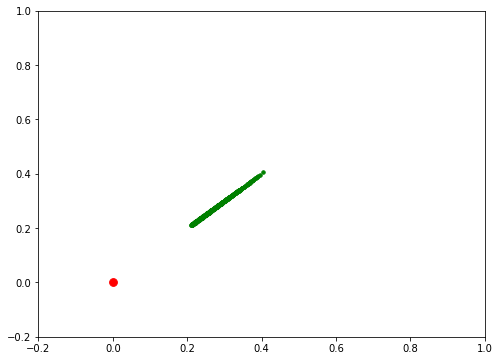

In [335]:
def draw(cord, target):
    plt.xlim((-0.2,1))
    plt.ylim((-0.2,1))
    plt.scatter(cord[:,0],cord[:,1],c='green',s=12)
    plt.scatter(target[0], target[1], c ='red', s = 60)
    
draw(cord,(target,target))
